### PROJET REALISE PAR: BESSEPOU Kpatcha Essossimna

### Rapport du projet:

Les médias sociaux deviennent un moyen de plus en plus utilisé pour partager des événements, exprimer des mécontentements et signaler des incidents, souvent accompagnés de frustrations. Avec les avancées dans le domaine de la science des données, il devient possible de recueillir des informations sur Internet et d'effectuer des analyses significatives pour dégager des insights.

Dans ce projet,nous nous sommes focalisés sur les incidents à savoir le  braquage ainsi que l'inondation.

#### Objectifs de l'étude :

1. **Inondations :**
   - Déterminer les zones à fortes inondations afin de prendre des mesures préventives telles que la mise en place de retenues d'eau et d'autres solutions connexes.

2. **Braquages et vols :**
   - Identifier les zones les plus touchées par les braquages et les vols, en vue d'alerter les autorités compétentes pour prendre des mesures appropriées en matière de sécurité publique.

#### Résultats de l'étude :

1. **Braquages :**
   - Lomé et Déckon sont les zones les plus touchées par les braquages.

2. **Inondations :**
   - La zone de Bè et les environs de Lomé sont les plus touchés par les inondations.

#### Limites de l'étude :

Cette étude présente certaines limites importantes :
- Les données proviennent uniquement du web scraping, ce qui peut limiter la représentativité des résultats.
- La portée des données est restreinte à quelques localités, ce qui peut ne pas être totalement représentatif de la situation générale.
- En perspective, l'obtention de données provenant d'autres canaux pourrait améliorer la fiabilité et la robustesse des résultats.

Malgré le fait que les résultats peuvent être biaisés vu la qualité ainsi que la quantité des données, les résultats actuels fournissent des informations utiles pour comprendre les tendances liées aux inondations et aux braquages dans les zones étudiées.

## Code du webScrapping

## 1- Pour innodations

In [ ]:
function YoutubeScraper() {
  var spreadSheet = SpreadsheetApp.getActiveSpreadsheet();
  var activeSheet = spreadSheet.getActiveSheet();

  var results = [];
  var videoStats = [];
  var pageToken = '';
  var allIds = [];
  
  do {
    // Retrieve search results and next page token
    var search = YouTube.Search.list('snippet', {
      q: 'Lomé et les innondations',
      maxResults: 50,
      pageToken: pageToken,
      publishedAfter: '2022-01-01T00:00:00Z',
      publishedBefore: '2023-12-31T23:59:59Z'
    });

    // Process search results and collect video IDs
    var searchResults = search.items.map(function(item) {
      allIds.push(item.id.videoId);
      return [item.id.videoId, item.snippet.title, item.snippet.publishedAt];
    });
    results = results.concat(searchResults);

    pageToken = search.nextPageToken;
  } while (pageToken && results.length < 100);
  
  // Function to chunk array into smaller arrays of a specified size
  function chunkArray(array, size) {
    var results = [];
    while (array.length) {
      results.push(array.splice(0, size));
    }
    return results;
  }

  // Split all video IDs into chunks
  var idChunks = chunkArray(allIds, 50);

  // Process each chunk of video IDs
  for (var i = 0; i < idChunks.length; i++) {
    var ids = idChunks[i].join(',');
    var stats = YouTube.Videos.list('statistics', {id: ids});
    
    // Process video statistics
    var statsResults = stats.items.map(function(item) {
      return [
        item.statistics.viewCount,
        item.statistics.likeCount
        // Note: YouTube no longer provides dislike counts.
      ];
    });
    videoStats = videoStats.concat(statsResults);
  }

  
  var categoryColumn = results.map(function() {
    return ["innondations"];
  });

  // Write the results and statistics to the spreadsheet
  activeSheet.getRange(2, 1, results.length, 3).setValues(results);
  activeSheet.getRange(2, 4, videoStats.length, 2).setValues(videoStats);
  
  // Write the 'category' column to the spreadsheet
  activeSheet.getRange(2, 6, categoryColumn.length, 1).setValues(categoryColumn);
}

// Make sure to call the function to run the scraper
YoutubeScraper();

## 2- Pour braquage

In [ ]:
function YoutubeScraper() {
  var spreadSheet = SpreadsheetApp.getActiveSpreadsheet();
  var activeSheet = spreadSheet.getActiveSheet();

  var results = [];
  var videoStats = [];
  var pageToken = '';
  var allIds = [];
  
  do {
    // Retrieve search results and next page token
    var search = YouTube.Search.list('snippet', {
      q: 'braquage-togo',
      maxResults: 50,
      pageToken: pageToken,
      publishedAfter: '2022-01-01T00:00:00Z',
      publishedBefore: '2023-12-31T23:59:59Z'
    });

    // Process search results and collect video IDs
    var searchResults = search.items.map(function(item) {
      allIds.push(item.id.videoId);
      return [item.id.videoId, item.snippet.title, item.snippet.publishedAt];
    });
    results = results.concat(searchResults);

    pageToken = search.nextPageToken;
  } while (pageToken && results.length < 100);
  
  // Function to chunk array into smaller arrays of a specified size
  function chunkArray(array, size) {
    var results = [];
    while (array.length) {
      results.push(array.splice(0, size));
    }
    return results;
  }

  // Split all video IDs into chunks
  var idChunks = chunkArray(allIds, 50);

  // Process each chunk of video IDs
  for (var i = 0; i < idChunks.length; i++) {
    var ids = idChunks[i].join(',');
    var stats = YouTube.Videos.list('statistics', {id: ids});
    
    // Process video statistics
    var statsResults = stats.items.map(function(item) {
      return [
        item.statistics.viewCount,
        item.statistics.likeCount
        // Note: YouTube no longer provides dislike counts.
      ];
    });
    videoStats = videoStats.concat(statsResults);
  }

  var categoryColumn = results.map(function() {
    return ["braquage"];
  });

  // Write the results and statistics to the spreadsheet
  activeSheet.getRange(2, 1, results.length, 3).setValues(results);
  activeSheet.getRange(2, 4, videoStats.length, 2).setValues(videoStats);
  
  // Write the 'category' column to the spreadsheet
  activeSheet.getRange(2, 6, categoryColumn.length, 1).setValues(categoryColumn);
}

// Make sure to call the function to run the scraper
YoutubeScraper();

## Cas du braquage au Togo

In [1]:
import pandas as pd

# Nos datasets
files = ['Feuille de calcul sans titre.xlsx', 'Feuille de calcul sans titre (1).xlsx','Feuille de calcul sans titre (4).xlsx','Feuille de calcul sans titre (5).xlsx','Feuille de calcul sans titre (6).xlsx']

#Défintion de notre DataFrame 
df = pd.DataFrame()

# Ajout de données au dataframe
for file in files:
    data = pd.read_excel(file)
    df = pd.concat([df, data], ignore_index=True)

In [2]:
#Affichage des données
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,HwgvodtTtWs,Togo: Braquage ou Vole de 400 000 000 chez un...,2023-11-11T02:42:21Z,13176.0,97.0,braquage
1,iwdZnUZrA0c,Togo: la police met la main sur un braqueur,2022-07-06T22:24:18Z,8966.0,65.0,braquage
2,Dk3fR8M6K3k,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,2023-11-23T11:59:33Z,14762.0,329.0,braquage
3,LwXaVNNQPAw,fusillade à dèkon lomé Togo (braquage grave),2022-10-25T06:30:48Z,1275.0,6.0,braquage
4,G7ta3IO6A-c,INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...,2022-01-20T20:59:35Z,1290.0,11.0,braquage


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  486 non-null    object 
 1   Unnamed: 1  500 non-null    object 
 2   Unnamed: 2  500 non-null    object 
 3   Unnamed: 3  492 non-null    float64
 4   Unnamed: 4  484 non-null    float64
 5   Unnamed: 5  500 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


In [4]:

duplicate_rows = df[df.duplicated()]

# Suppressions de lignes dupliquées
df_no_duplicates = df.drop_duplicates()


In [5]:
# Sauvegarde dans df1
df1=df_no_duplicates
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 398
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  236 non-null    object 
 1   Unnamed: 1  246 non-null    object 
 2   Unnamed: 2  246 non-null    object 
 3   Unnamed: 3  240 non-null    float64
 4   Unnamed: 4  236 non-null    float64
 5   Unnamed: 5  246 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.5+ KB


In [6]:
#récupération de  la colonne qui doit être prétraitée
df2=df1['Unnamed: 1']
df2

0      Togo: Braquage ou Vole  de 400 000 000 chez un...
1            Togo: la police met la main sur un braqueur
2      LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...
3           fusillade à dèkon lomé Togo (braquage grave)
4      INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...
                             ...                        
391    Présentation de &quot;Braquage du Pouvoir&quot...
394    L&#39;Ennemi juré de Pablo Escobar (Le Cartel ...
396    ils ont attrapé une petite voleuse avec ses co...
397    Entretien Exclusif avec Dr. Agbeyome Kodjo, Pr...
398         Togo: des malfrats appréhendés par la police
Name: Unnamed: 1, Length: 246, dtype: object

In [7]:
#Affichage des données
for i in range(10,25):
    print(df1['Unnamed: 1'][i])

💯braquage #togo #lomerica
🛑ENCORE UN NOUVEAU BRAQUAGE A LOME
Braquage &amp; Fusillade à LOME (Attention)
Togo/Braquage : plus de 89 millions de FCFA emportés
Togo:6malfrats dans les mailles de la police
Togo : trois braqueurs dont une femme interpellés par la police ; leur mode opératoire
Les quartiers les plus dangereux de Lomé ou les braqueurs cachent leurs fusils
BRAQUAGE À LOMÉ, SANTRINOS LE DIGNE FILS DE EMMANUEL ADEBAYOR, LES CONSEILS DE HODAKO
De faux policiers arrêtés pour vols à la frontière Ghana-Togo
Arrestation de deux braqueurs
AbidjanTV.net: les braqueurs ayant tué un inspecteur d&#39;orientation et blessé un policier arrêtés
Togo-Braquage : Yark Damehame très fâché
Tentative de Braquage à lomé-dekon (TOGO actualités)
LA POLICE DÉMANTÈLE UN VASTE RÉSEAU DE VOLEURS DE TÉLÉPHONES À LOMÉ
Togo/Braquage : plus de 89 millions de FCFA emportés


### Processus de tokennisation

In [8]:
from collections import Counter
#split() pour découper les mots
word_list = df1["Unnamed: 1"].str.cat(sep=' ').split()

# Comptons les mots
word_counts = Counter(word_list)


In [9]:
# Affichage des 20 premiers mots
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

de:  	104 
::  	58 
du:  	52 
la:  	34 
à:  	34 
le:  	31 
au:  	30 
DE:  	24 
un:  	23 
|:  	20 
par:  	19 
Togo:  	18 
et:  	18 
des:  	18 
Togo::  	17 
Le:  	17 
La:  	16 
avec:  	15 
-:  	14 
Un:  	13 


#### Nous remarquons que les mots les de la liste ne sont pas des mots spécifiques pour l'étude du texte. Pour cela, on doit enlever ces mots.

In [10]:

#word_list = df1["Unnamed: 1"].str.cat(sep=' ').split()
stopwords = ["de", "du", "le", "la", "les", "à", "en", "sur", "dans","un","au",'DE','et','des','Le','avec','est','une','La', 'Un','par']
# Comptons les mots
nostopwords = [ word for word in word_list if word not in stopwords ]
nostopwords = []
for word in word_list:
    if word not in stopwords:
        nostopwords.append(word)


In [11]:
Counter(nostopwords).most_common(30)

[(':', 58),
 ('|', 20),
 ('Togo', 18),
 ('Togo:', 17),
 ('-', 14),
 ('À', 13),
 ('braquage', 12),
 ('millions', 12),
 ('Lomé', 12),
 ('Braquage', 11),
 ('A', 10),
 ('braqueurs', 10),
 ('2', 9),
 ('Les', 9),
 ('LOMÉ', 9),
 ('comment', 9),
 ('Ladjagaï', 8),
 ('sa', 8),
 ('400', 7),
 ('ministre', 7),
 ('BRAQUAGE', 7),
 ('moto', 7),
 ('Arrestation', 7),
 ('voici', 7),
 ('Gabon', 7),
 ('fin', 7),
 ('Président', 7),
 ('président', 7),
 ('?', 7),
 ('I', 7)]

In [12]:

import string
# Stopwords à exclure
stopwords = ["de", "du", "le", "la", "les", "à", "en", "sur", "dans", "un", "au",'DE','et','des','Le','avec','est','une','La','Un','par','pour','il']

# Ponctuations à exclure
punctuations = string.punctuation

# Supprimons les stopwords
nostopwords = [word for word in word_list if word.lower() not in stopwords]

# Supprimons les ponctuations
words_without_punctuations = [''.join(char for char in word if char not in punctuations) for word in nostopwords]

# Supprimons les mots vides résultants de la suppression des ponctuations
wordsR = list(filter(None, nostopwords))

# les mots
word_counts = Counter(wordsR)


In [13]:
word_counts

Counter({'Togo:': 17,
         'Braquage': 11,
         'ou': 3,
         'Vole': 2,
         '400': 7,
         '000': 4,
         'chez': 2,
         'ministre': 7,
         'faure': 2,
         'Gnassingbé.': 2,
         'police': 6,
         'met': 1,
         'main': 4,
         'braqueur': 3,
         'LOME:': 1,
         'FUSILLADE': 1,
         'BRAQUAGE': 7,
         'A': 10,
         'LOME..VOL': 1,
         'MALLETTES': 1,
         'D’ARGENT!': 1,
         'fusillade': 1,
         'dèkon': 1,
         'lomé': 2,
         'Togo': 18,
         '(braquage': 1,
         'grave)': 1,
         'INSÉCURITÉ': 1,
         'TOGO': 2,
         ':': 58,
         'Deuxième': 1,
         'braquage': 12,
         '48': 1,
         'heures': 1,
         'AUTEURS': 1,
         'RECENTS': 1,
         'BRAQUAGES': 3,
         'LOME': 3,
         'MAILLES': 1,
         'POLICE': 3,
         '|': 20,
         'MONDE': 1,
         'ACTU': 1,
         'TOGO:': 3,
         'Tentative': 2,
         

In [14]:
from nltk.stem import PorterStemmer
# instantiation d'un stemmer
ps = PorterStemmer()

#  stem des tokens
stems   = [ps.stem(tk) for tk in wordsR]

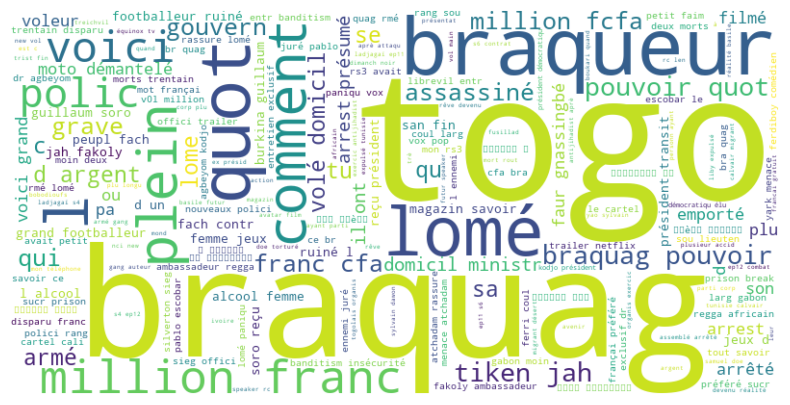

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir les stems en une chaîne de caractères séparés par des espaces
stems_text = ' '.join(stems)

# Création d'un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stems_text)

# Afficher le WordCloud en utilisant matplotlib pour voir les mots récurrents
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Après l'analyse de nos données, nous remarquons qu'on a des données qui concernent d'autres pays et des données qui n'ont pas de lien avec notre étude.
Nous allons les éliminer dans la suite 

In [16]:
mots=["Togo","TOGO","Lomé","Amoutivé","ministre","Kodzo",'Adédzé Kovié', 'Kodzo Adédzé','Assivito',"Lomé",
     'aéroport','dèkon','quartier', 'Aképé','Déckon', 'Miwoe', 'negnon', 'Ako', 'swa','filmé', 'Caméra', 'Yark',
'quartier', 'Aképé', "LOME",
'Casinos', 'réaction Yaovi', 'DG Police','UTB','Yark Damehame']
# Sélection des lignes qui contiennent au moins un des mots-clés
resultat = df1[df1.apply(lambda row: any(mot in str(row['Unnamed: 1']) for mot in mots), axis=1)]

# Enregistrement du résultat dans un fichier CSV
resultat.to_csv('Togoo.csv', index=False)


#### Nous travaillons désormais avec les données du Togo et qui ont un lien avec le braquage.

In [17]:
data=pd.read_csv('Togoo.csv')

In [18]:
data.shape# les données sont restreintes à 78 lignes

(78, 6)

In [19]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,HwgvodtTtWs,Togo: Braquage ou Vole de 400 000 000 chez un...,2023-11-11T02:42:21Z,13176.0,97.0,braquage
1,iwdZnUZrA0c,Togo: la police met la main sur un braqueur,2022-07-06T22:24:18Z,8966.0,65.0,braquage
2,Dk3fR8M6K3k,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,2023-11-23T11:59:33Z,14762.0,329.0,braquage
3,LwXaVNNQPAw,fusillade à dèkon lomé Togo (braquage grave),2022-10-25T06:30:48Z,1275.0,6.0,braquage
4,G7ta3IO6A-c,INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...,2022-01-20T20:59:35Z,1290.0,11.0,braquage


In [20]:
data1=data["Unnamed: 1"]
data1[:7]

0    Togo: Braquage ou Vole  de 400 000 000 chez un...
1          Togo: la police met la main sur un braqueur
2    LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...
3         fusillade à dèkon lomé Togo (braquage grave)
4    INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...
5    LES AUTEURS DES RECENTS BRAQUAGES A LOME DANS ...
6                          TOGO: Tentative de braquage
Name: Unnamed: 1, dtype: object

In [21]:

import string

stopwords = ["de", "du", "le", "la", "les", "à", "en", "sur", "dans", "un", "au", 'DE', 'et', 'des', 'Le', 'avec', 'est', 'chez', 'a', 'ou',
             'une', 'La', 'Un', 'par', 'pour', 'il', "à", '#', '$', '%', '&', '\'', ')', '+', '-', ':', ';']

# Ponctuations à exclure
punctuations = string.punctuation

# Fonction pour nettoyer une ligne
def clean_text(line):
    # Supprimer les ponctuations
    line = ''.join(char for char in line if char not in punctuations)
    # Supprimer les stopwords
    words = [word.lower() for word in line.split() if word.lower() not in stopwords]
    return ' '.join(words)

# Appliquer la fonction clean_text à chaque ligne
cleaned_data = data1.apply(clean_text)

# Affichage les 7 premières lignes du résultat
print(cleaned_data[:7])


0    togo braquage vole 400 000 000 ministre faure ...
1                        togo police met main braqueur
2    lome fusillade braquage lomevol mallettes d’ar...
3             fusillade dèkon lomé togo braquage grave
4          insécurité togo deuxième braquage 48 heures
5    auteurs recents braquages lome mailles police ...
6                              togo tentative braquage
Name: Unnamed: 1, dtype: object


#### Recueillons les données pour chaque localité du dataset

In [22]:
import pandas as pd
import string

localites = ["aéorport", 'dèkon', 'DEKON', 'Aképé', "Amoutivé", 'Aképé', 'Ako', 'swa', 'Assivito',
             "Lomé", "LOME", 'UTB','assivito','Assivito']

# Fonction pour extraire les localités d'une ligne
def extract_localites(line):
    line_lower = line.lower()  # Convertir en minuscules pour la correspondance insensible à la casse
    return [loc for loc in localites if loc.lower() in line_lower]

# Appliquons la fonction pour chaque ligne
data['Localites'] = data["Unnamed: 1"].apply(extract_localites)



In [23]:
# Affichage des premières lignes du résultat
data[['Unnamed: 1', 'Localites']].head()


,Unnamed: 1,Localites
0,Togo: Braquage ou Vole de 400 000 000 chez un...,[]
1,Togo: la police met la main sur un braqueur,[]
2,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,[LOME]
3,fusillade à dèkon lomé Togo (braquage grave),"[dèkon, Lomé]"
4,INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...,[]


In [24]:

# Fonction pour extraire la première localité d'une ligne
def extract_first_locality(line):
    line_lower = line.lower()  # Convertir en minuscules pour la correspondance insensible à la casse
    localites_found = [loc for loc in localites if loc.lower() in line_lower]

    if localites_found:
        return localites_found[0]  # Retourner le premier élément de la liste
    else:
        return 'Togo'  # Retourner 'Togo' si aucune localité n'est trouvée

# Appliquer la fonction pour chaque ligne
data['Localites'] = data["Unnamed: 1"].apply(extract_first_locality)

# Afficher les premières lignes du résultat
print(data[['Unnamed: 1', 'Localites']].head())


                                          Unnamed: 1 Localites
0  Togo: Braquage ou Vole  de 400 000 000 chez un...      Togo
1        Togo: la police met la main sur un braqueur      Togo
2  LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...      LOME
3       fusillade à dèkon lomé Togo (braquage grave)     dèkon
4  INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...      Togo


In [25]:
data[['Unnamed: 1', 'Localites']].head()

,Unnamed: 1,Localites
0,Togo: Braquage ou Vole de 400 000 000 chez un...,Togo
1,Togo: la police met la main sur un braqueur,Togo
2,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,LOME
3,fusillade à dèkon lomé Togo (braquage grave),dèkon
4,INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...,Togo


In [26]:

# Liste de localités
localites = ["aéroport", 'dèkon', 'DEKON', 'Aképé', "Amoutivé", 'Aképé',"assivito", 'Ako', 'swa', 'Assivito',
             "Lomé", "LOME", 'UTB']

# Fonction pour extraire la première localité d'une ligne
def extract_first_locality(line):
    line_lower = line.lower()  # Convertir en minuscules pour la correspondance insensible à la casse
    localites_found = [loc for loc in localites if loc.lower() in line_lower]

    if localites_found:
        return localites_found[0]  # Retourner le premier élément de la liste
    else:
        return 'Togo'  # Retourner 'Togo' si aucune localité n'est trouvée

# Appliquer la fonction pour chaque ligne
data['Localites'] = data["Unnamed: 1"].apply(extract_first_locality)

# Afficher les premières lignes du résultat
print(data[['Unnamed: 1', 'Localites']].head())


                                          Unnamed: 1 Localites
0  Togo: Braquage ou Vole  de 400 000 000 chez un...      Togo
1        Togo: la police met la main sur un braqueur      Togo
2  LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...      LOME
3       fusillade à dèkon lomé Togo (braquage grave)     dèkon
4  INSÉCURITÉ AU TOGO : Deuxième braquage en 48 h...      Togo


In [27]:

result = data.groupby('Localites')['Unnamed: 1'].apply(lambda x: ', '.join(x)).reset_index()

# Renommer la colonne résultante
result = result.rename(columns={'Unnamed: 1': 'Concatenated_Info'})

# Afficher le résultat


In [28]:
result["Concatenated_Info"][7]

'spectaculaire braquage à UTB circulaire, plusieurs millions emportés!'

In [29]:
# Remplacer les valeurs dans la colonne "Localites"
data['Localites'] = data['Localites'].replace({'DEKON': 'Dekon', 'dèkon': 'Dekon', 'LOME': 'Lomé', 'lomé': 'Lomé'})

# Grouper par la colonne "Localites" et concaténer les valeurs de "Unnamed: 1"
result = data.groupby('Localites')['Unnamed: 1'].apply(lambda x: ', '.join(x)).reset_index()

# Renommer la colonne résultante
result = result.rename(columns={'Unnamed: 1': 'Concatenated_Info'})

In [30]:
result["Concatenated_Info"][4]

'LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MALLETTES D’ARGENT!, LES AUTEURS DES RECENTS BRAQUAGES A LOME DANS LES MAILLES  DE LA POLICE | MONDE ACTU, 🛑ENCORE UN NOUVEAU BRAQUAGE A LOME, Braquage &amp; Fusillade à LOME (Attention), Les quartiers les plus dangereux de Lomé ou les braqueurs cachent leurs fusils, Braquage à Lomé ce matin : la réaction de Yaovi Okpaoul, DG de la Police, TOGO-COTE D’IVOIRE: Recherché pour cambriolage à Abidjan, il se refugie à Lomé, Togo🇹🇬:voici un Lieu Mystérieux dans un quartier de Lomé, Un accident très grave aujourd&#39;hui à Lomé 😭, Togo: Yark menace, Atchadam rassure, Lomé panique ! [Vox Pop], Togo Braquages sur la voie qui dessert la présidence de Lomé, Un accident très grave aujourd&#39;hui à Lomé 😭, Togo: Yark menace, Atchadam rassure, Lomé panique ! [Vox Pop], 🇹🇬 La verité sur le braquage à Lomé , Une attaque terroriste au Benin !, Togo: Yark menace, Atchadam rassure, Lomé panique ! [Vox Pop], Togo: Yark menace, Atchadam rassure, Lomé panique ! [V

#### Comme le montre l'affichage des lignes 5 et 8 du dataset, les informations ont été bien concaténées suivant les localités.

#### Suppression des mots inutiles pur l'analyse

    
Nous enlevons ici les mots de words_clean car ne sont pas nécessaires pour analyser le degré des braquages ou vol.

### Déterminons la gravité des braquages au niveau des localités

In [31]:
import pandas as pd
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Chargeons le modèle et le tokenizer en français
model_name = "camembert-base"
tokenizer = CamembertTokenizer.from_pretrained(model_name)
model = CamembertForSequenceClassification.from_pretrained(model_name)

# Liste de mots à enlever
words_to_remove = ["togo", "lomé", "amoutivé", "utb", "parage", "aéroport", "Togo", "de", "à", "un", "qui", "ce", "se", ",", "aéroport", "assivito", "dekon", "dèkon", "utb", "amoutivé", "au", "du", "match", "epervier", "lome", "Dekon", "terroriste", "pour", "les"]

# Fonction pour enlever les mots
def remove_words(text):
    for word in words_to_remove:
        text = text.replace(word, "")
    return text

# Appliquer la fonction pour enlever les mots
result["Cleaned_Info"] = result["Concatenated_Info"].apply(remove_words)

# Traitement des données
texts = result["Cleaned_Info"].tolist()

# Tokenisationet formatage les textes pour l'analyse
inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True)

# Effectuer la prédiction
with torch.no_grad():
    outputs = model(**inputs)

# Récupérons les scores de probabilité pour chaque texte
probs = softmax(outputs.logits, dim=1).tolist()

# Ajoutons la probabilité de gravité à la dataframe
result["Gravity_Probability"] = [prob[0] for prob in probs]



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
# Affichons les résultats
result[["Cleaned_Info", "Gravity_Probability"]]


,Cleaned_Info,Gravity_Probability
0,Miwoe negnon 21 11 2023- le s s -Braquage A...,0.513128
1,: danger poste péage d’Aképé !,0.514323
2,TOGO/Fusillas 24 octobre Amoutivé : La mère ...,0.518928
3,fusilla (braquage grave) Tentative Braqua...,0.515995
4,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,0.505903
5,: Braquage ou Vole 400 000 000 chez ministr...,0.514322
6,spectaculaire braquage UTB circulaire plusieu...,0.519440
7,s braqueurs frappent Assivito gros magot emp...,0.523035
8,voleur frappé ...etc,0.520618


#### Le résultat obtenu avec le modèle pré-etrainer n'est pas assez satisfaisante,on dirait que toutes les localités ont la  même gravité en terme de braquage. Nous allons par la suite, déterminer cette gravité en fonction de la récurrence de  certains mots et aussi en leur affectant des poids.

In [33]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize


# Concaténons toutes les informations nettoyées en une seule chaîne de caractères
all_cleaned_info = ' '.join(result['Cleaned_Info'])

# Tokens des mots
tokens = word_tokenize(all_cleaned_info)

# Calculer la fréquence des mots
freq_dist = FreqDist(tokens)



In [34]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [35]:
# stemmatisation des tokens
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Appliquer la stemmatisation à la colonne Cleaned_Info
result['Stemmed_Info'] = result['Cleaned_Info'].apply(stem_text)

In [36]:
result['Stemmed_Info']

0     miwo negnon 21 11 2023- le s s -braquag akoswa -
1                      : danger post péage d ’ aképé !
2    togo/fusilla 24 octobr amoutivé : la mère garç...
3    fusilla ( braquag grave ) tent braquag -kon ( ...
4    lome : fusillad et braquag a lome .. vol de ma...
5    : braquag ou vole 400 000 000 chez ministr fre...
6    spectaculair braquag utb circulair plusieur mi...
7       s braqueur frappent assivito gro magot emporté
8                                voleur frappé ... etc
Name: Stemmed_Info, dtype: object

In [37]:
# Liste des mots issus de la stemmatisation à considérer
features = ['braquag', 'braqueur', 'million', 'paniqu', 'volé', 'tué', 'attaque', 'fusilla', 'danger', 'vol', 'grave', 'attaque', 'faché', 'panique', 'fusils']

# Poids de gravité attribués à chaque mot 
weights = {'braquag': 5, 'braqueur': 4, 'million': 3, 'paniqu': 2, 'volé': 5, 'tué': 5, 'attaque': 4, 'fusilla': 4, 'danger': 3, 'vol': 3, 'grave': 4, 'faché': 2, 'panique': 2, 'fusils': 5}

# Fonction pour calculer la gravité d'une ligne
def calculate_gravity(row):
    gravity_score = 0
    for word in features:
        if word in row:
            gravity_score += weights.get(word, 1)  # 1 est le poids par défaut 

    return gravity_score

# calcul de la gravité à chaque ligne
result['Gravity_Score'] = result['Stemmed_Info'].apply(calculate_gravity)


In [38]:
result['Gravity_Score']

0     5
1     3
2     9
3    13
4    25
5    25
6     8
7     4
8     3
Name: Gravity_Score, dtype: int64

In [39]:
result[['Localites','Gravity_Score']]

,Localites,Gravity_Score
0,Ako,5
1,Aképé,3
2,Amoutivé,9
3,Dekon,13
4,Lomé,25
5,Togo,25
6,UTB,8
7,assivito,4
8,aéroport,3


In [40]:
import numpy as np

# Liste des mots à considérer
features = ['braquag', 'braqueur', 'million', 'paniqu', 'volé', 'tué', 'attaque', 'fusilla', 'danger', 'vol', 'grave', 'attaque', 'faché', 'panique', 'fusils']

# Poids de gravité attribués à chaque mot (c'est un exemple, ajustez les valeurs en fonction de la gravité perçue)
weights = {'braquag': 5, 'braqueur': 4, 'million': 3, 'paniqu': 2, 'volé': 5, 'tué': 5, 'attaque': 4, 'fusilla': 4, 'danger': 3, 'vol': 3, 'grave': 4, 'faché': 2, 'panique': 2, 'fusils': 5}

# Fonction pour calculer la gravité d'une ligne
def calculate_gravity(row):
    gravity_scores = np.zeros(len(features))

    for i, word in enumerate(features):
        if word in row:
            gravity_scores[i] = weights.get(word, 1)  # 1 est le poids par défaut si le mot n'a pas de poids attribué

    # Appliquer la fonction softmaxpour le calcul de la probabilité
    exp_scores = np.exp(gravity_scores)
    probabilities = exp_scores / np.sum(exp_scores)


    truncated_probabilities = np.round(probabilities, 2)

    return truncated_probabilities

#  calcul des probabilités de gravité à chaque ligne
result['Gravity_Probabilities'] = result['Stemmed_Info'].apply(calculate_gravity)


In [41]:
result

,Localites,Concatenated_Info,Cleaned_Info,Gravity_Probability,Stemmed_Info,Gravity_Score,Gravity_Probabilities
0,Ako,Miwoe negnon du 21 11 2023- le match des eperv...,Miwoe negnon 21 11 2023- le s s -Braquage A...,0.513128,miwo negnon 21 11 2023- le s s -braquag akoswa -,5,"[0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
1,Aképé,Togo : danger au poste de péage d’Aképé !,: danger poste péage d’Aképé !,0.514323,: danger post péage d ’ aképé !,3,"[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.0..."
2,Amoutivé,TOGO/Fusillades du 24 octobre à Amoutivé : La ...,TOGO/Fusillas 24 octobre Amoutivé : La mère ...,0.518928,togo/fusilla 24 octobr amoutivé : la mère garç...,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.69, 0.0, 0.25, 0.0..."
3,Dekon,"fusillade à dèkon lomé Togo (braquage grave), ...",fusilla (braquage grave) Tentative Braqua...,0.515995,fusilla ( braquag grave ) tent braquag -kon ( ...,13,"[0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0,..."
4,Lomé,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,LOME: FUSILLADE ET BRAQUAGE A LOME..VOL DE MAL...,0.505903,lome : fusillad et braquag a lome .. vol de ma...,25,"[0.4, 0.15, 0.0, 0.02, 0.0, 0.0, 0.0, 0.15, 0...."
5,Togo,Togo: Braquage ou Vole de 400 000 000 chez un...,: Braquage ou Vole 400 000 000 chez ministr...,0.514322,: braquag ou vole 400 000 000 chez ministr fre...,25,"[0.27, 0.1, 0.04, 0.0, 0.27, 0.27, 0.0, 0.0, 0..."
6,UTB,"spectaculaire braquage à UTB circulaire, plusi...",spectaculaire braquage UTB circulaire plusieu...,0.519440,spectaculair braquag utb circulair plusieur mi...,8,"[0.82, 0.01, 0.11, 0.01, 0.01, 0.01, 0.01, 0.0..."
7,assivito,"des braqueurs frappent à Assivito, un gros mag...",s braqueurs frappent Assivito gros magot emp...,0.523035,s braqueur frappent assivito gro magot emporté,4,"[0.01, 0.8, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01..."
8,aéroport,voleur frappé à...etc Togo lomé parage aéroport,voleur frappé ...etc,0.520618,voleur frappé ... etc,3,"[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.0..."


In [42]:
import folium# création de carte interactive
from IPython.display import display# affichage de la carte

# Coordonnées des localités
locations = {
    'Assivito': (6.12880037412473, 1.2224637126653288),
    'Dekon': (6.125911645354329, 1.2254264666441377),
    'Amoutivé': (6.139536479116235, 1.2348394025901068),
    'Aképé': (6.229690479554573, 1.0702770703362845),
    'Aéroport': (6.171192083408104, 1.2531533964962847),
    'Akodessewa': (6.164546968589084, 1.2676275511745245),
    'Lomé': (6.213592669236006, 1.2018042675347331),
}

# Ajout la gravité à chaque localité 
gravity_data = {
    'Assivito': 5,
    'Dekon': 13,
    'Amoutivé': 9,
    'Aképé': 3,
    'Aéroport': 3,
    'Akodessewa': 5,
    'Lomé': 25,
}

# Fonction pour attribuer une couleur en fonction de la gravité
def get_color(gravity):
    if gravity >= 20:
        return 'red'
    elif gravity >= 12:
        return 'orange'
    else:
        return 'green'

# Création de la carte
map_center = (6.18, 1.2)  # Centre de la carte
my_map = folium.Map(location=map_center, zoom_start=12)

# Ajout des marqueurs pour chaque localité
for location, coordinates in locations.items():
    gravity = gravity_data.get(location, 12)  
    color = get_color(gravity)
    folium.Marker(location=coordinates, popup=f'Gravité: {gravity}', tooltip=location, icon=folium.Icon(color=color)).add_to(my_map)

# Affichage la carte dans le notebook
display(my_map)


## Cas de l'innondation au Togo

In [43]:
import pandas as pd

file=['innonda.csv','innondation2.csv','innondation3.csv','innondation4.csv']

# Définition de notre DataFrame 
df = pd.DataFrame()

# Ajout de données au dataframe
for fichier in file:
    data = pd.read_csv(fichier)  # Use the variable 'fichier' here, not 'file'
    df = pd.concat([df, data], ignore_index=True)


In [44]:

duplicate_rows = df[df.duplicated()]

# Suppressions de lignes dupliquées
df = df.drop_duplicates()


In [45]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,jyLhR0ulGro,Inondation à Lomé,2023-07-12T23:48:35Z,12251,55.0,innondations
1,przFYAMgRVM,INONDATIONS À LOMÉ À CAUSE DE LA FORTE PLUIE 2...,2023-07-13T00:23:14Z,6309,71.0,innondations
2,7XLliLXEeuU,TOGO-LOME inondation après la pluie du 12-07-2...,2023-07-13T11:00:10Z,338,0.0,innondations
3,wZ21u-DzxtU,Togo : le grand Lomé et les inondations,2023-06-25T15:00:41Z,3690,30.0,innondations
4,mlwg2u_SAOw,Inondations mortelles dans le nord-est de l&#3...,2023-05-19T06:41:01Z,7304,73.0,innondations


In [46]:
#Renommons les colonnes
names=['id','description','date','num_like','num_commentaire','classe']
df.columns = names
df.head()

,id,description,date,num_like,num_commentaire,classe
0,jyLhR0ulGro,Inondation à Lomé,2023-07-12T23:48:35Z,12251,55.0,innondations
1,przFYAMgRVM,INONDATIONS À LOMÉ À CAUSE DE LA FORTE PLUIE 2...,2023-07-13T00:23:14Z,6309,71.0,innondations
2,7XLliLXEeuU,TOGO-LOME inondation après la pluie du 12-07-2...,2023-07-13T11:00:10Z,338,0.0,innondations
3,wZ21u-DzxtU,Togo : le grand Lomé et les inondations,2023-06-25T15:00:41Z,3690,30.0,innondations
4,mlwg2u_SAOw,Inondations mortelles dans le nord-est de l&#3...,2023-05-19T06:41:01Z,7304,73.0,innondations


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               235 non-null    object 
 1   description      237 non-null    object 
 2   date             237 non-null    object 
 3   num_like         237 non-null    int64  
 4   num_commentaire  234 non-null    float64
 5   classe           237 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 13.0+ KB


In [48]:
df2=df['description']
df2

0                                      Inondation à Lomé
1      INONDATIONS À LOMÉ À CAUSE DE LA FORTE PLUIE 2...
2      TOGO-LOME inondation après la pluie du 12-07-2...
3                Togo : le grand Lomé et les inondations
4      Inondations mortelles dans le nord-est de l&#3...
                             ...                        
395    Festival de volleyball des communes : Agoè-nyi...
396    #pluie pluie tombe depuis le 4h du matin  🇹🇬TO...
397                zone de tokoin hôpital Lomé togo 🇹🇬🇹🇬
398    TOGO, Lomé vue d&#39;en haut, routes, boulevar...
399    Dialecte EWE sud Togo/ Pouvoir à la langue par...
Name: description, Length: 237, dtype: object

### Processus de tokennisation et de lemmatisation

In [49]:
from collections import Counter
#split() pour découper les mots
word_list = df2.str.cat(sep=' ').split()

# Comptons les mots
word_counts = Counter(word_list)


In [50]:
# Affichage des 20 premiers mots
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

de:  	83 
Lomé:  	80 
à:  	73 
la:  	73 
::  	56 
Togo:  	50 
des:  	45 
les:  	38 
pluie:  	35 
le:  	31 
au:  	27 
-:  	23 
inondations:  	22 
du:  	21 
dans:  	21 
après:  	17 
et:  	17 
TOGO:  	17 
Inondation:  	16 
en:  	16 


#### Nous remarquons que les mots les de la liste ne sont pas des mots spécifiques pour l'étude du texte. Pour cela, on doit enlever ces mots.

In [51]:

stopwords = ["de", "du", "le", "la", "les", "à", "en", "sur", "dans","un","au",'DE','et','des','Le','après','-','dans','2023','en','avec','est',
             'une','La', 'Un','par','À','TOGO','in','LA','of','#togo','a','#lomé','LES',
             'quartiers','l&#39','inondation','Togo.','route']
# Comptons les mots
nostopwords = [ word for word in word_list if word not in stopwords ]
nostopwords = []
for word in word_list:
    if word not in stopwords:
        nostopwords.append(word)

In [52]:
word_list

['Inondation',
 'à',
 'Lomé',
 'INONDATIONS',
 'À',
 'LOMÉ',
 'À',
 'CAUSE',
 'DE',
 'LA',
 'FORTE',
 'PLUIE',
 '2023',
 '#lome',
 '#togo',
 '#2023',
 'TOGO-LOME',
 'inondation',
 'après',
 'la',
 'pluie',
 'du',
 '12-07-2023',
 '#inondations',
 '#togo',
 '#pluie',
 '#lomé',
 'Togo',
 ':',
 'le',
 'grand',
 'Lomé',
 'et',
 'les',
 'inondations',
 'Inondations',
 'mortelles',
 'dans',
 'le',
 'nord-est',
 'de',
 'l&#39;Italie',
 ':',
 'le',
 'signe',
 'de',
 'la',
 '&quot;tropicalisation&quot;',
 'du',
 'climat',
 'Lomé',
 'Inondation',
 'Agoè',
 'kitidjan',
 'sous',
 'les',
 'eaux',
 'Des',
 'bassins',
 'de',
 'rétention',
 'efficaces',
 'dans',
 'certains',
 'quartiers',
 'de',
 'Lomé',
 'Grosse',
 'pluie',
 'de',
 'ce',
 'matin',
 'à',
 'Lomé:',
 'les',
 'dégâts',
 'sont',
 'énormes',
 '-',
 'NO',
 'COMMENT',
 'Togo',
 '-',
 'Lomé',
 'after',
 'the',
 'rain',
 'of',
 'September',
 '2,',
 '2023',
 'Inondation',
 'Lomé',
 '#☔La',
 'pluie',
 'tombe',
 'au',
 'Togo🇹🇬',
 'mais',
 'la',
 '

#### L'affichage de word_list, nous a permis de déterminer les localités qui se retrouvent dans nos données. Cela nous permettra de mieux faire la classification suivant les zones.

In [53]:
Counter(nostopwords).most_common(30)

[('Lomé', 80),
 (':', 56),
 ('Togo', 50),
 ('pluie', 35),
 ('inondations', 22),
 ('Inondation', 16),
 ('Inondations', 14),
 ('LOMÉ', 11),
 ('Lomé,', 11),
 ('aux', 11),
 ('sous', 9),
 ('DU', 9),
 ('TOGO,', 9),
 ('PLUIE', 8),
 ('Togo:', 8),
 ('pluies', 8),
 ('Togo,', 8),
 ('Agoe', 8),
 ('eaux', 7),
 ('morts', 7),
 ('Des', 6),
 ('l&#39;inondation', 6),
 ('marché', 6),
 ('Lome', 6),
 ('2022', 6),
 ('Agoè', 5),
 ('|', 5),
 ('#inondation', 5),
 ('Les', 5),
 ('moins', 5)]

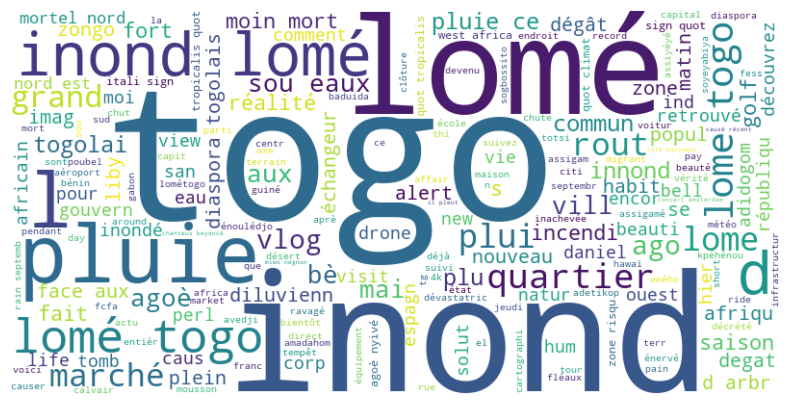

In [54]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Vos stopwords personnalisés
mots_vides = ["de", "du", "le", "la", "les", "à", "en", "sur", "dans", "un", "au", 'DE', 'et', 'des', 'Le', 'après', '-', 'dans', '2023', 'en', 'avec', 'est',
             'une', 'La', 'Un', 'par', 'À', '', 'in', 'LA', 'of', '#togo', 'a', '#lomé', 'LES',
          ]

# Initialiser le stemmer (racinisateur)
racinisateur = nltk.PorterStemmer()

# Fonction pour le prétraitement d'une chaîne
def preprocess_text(texte):
    # Tokenisation
    tokens = word_tokenize(texte)
    
    # Supprimons les mots vides et appliquer la lemmatisation
    tokens_traites = [racinisateur.stem(token) for token in tokens if token.lower() not in mots_vides]
    
    return tokens_traites

# Appliquons le prétraitement à la colonne "description" de df2
df["description_traitee"] = df["description"].apply(lambda x: ' '.join(preprocess_text(x)))

# Concaténons toutes les descriptions prétraitées en une seule chaîne
texte_traite = ' '.join(df["description_traitee"])

# Configurons et générons le nuage de mots
nuage_mots = WordCloud(width=800, height=400, background_color='white').generate(texte_traite)

# Affichons le nuage de mots à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nuage_mots, interpolation='bilinear')
plt.axis('off')  
plt.show()


### Cherchons maintenant à éliminer les autres mots qui n'apportent pas assez d'informations; comme nous pouvons le remarquer "Togo" revient énormément alors que nous savons déjà que les données concernent bien le Togo.

In [55]:
df["description_traitee"][29:35]

29    lomé perl l & # 39 ; afriqu l & # 39 ; ouest ,...
30                                togo inond voici fait
31                        togo-chut d ’ arbr lomé pluie
32                     daniel , l & # 39 ; inond lome .
33                         togo : marché ravagé incendi
34    chine , conduir voitur volant ne sera bientôt ...
Name: description_traitee, dtype: object

In [56]:
df["description_traitee"][78:98]

78                                     inond lomé ( 2 )
79                          togo lomé kpalimé 14 octobr
80                        lome , togo , grand ago pluie
81               deuil souffranc tremblement terr maroc
82           pain d & # 39 ; assigamé grand marché lomé
83                    togo- focu champ école producteur
84    4k view lomé , capit togo . aerial view thi af...
85       togo : découvrez beauté lomé , perl golf guiné
86                               centr vill , lome togo
87                                   explor lome , togo
88    kolani innond lome : ce que nou somm fier ce p...
89         inond pluie togo # togo # short # shortvideo
90    lomé-togo 🇹🇬aprè fort pluie matiné mercredi .....
91    baduida nouveau marché , marché , lomé , togo ...
92    togo : ministr ayewouadan crée ond choc se déc...
93                            togo journal tv2 14 10 22
94               togo : encor inond lomé moi septembr ?
95                       togo : inquiétud libert

In [57]:
df["description_traitee"][23:29]

23                        imag californi submergé inond
24                                  inond lomé ( togo )
25    états-uni : percuté pneu , voitur s ’ envol l ...
26    liby : tempêt daniel fait moin 150 mort l & # ...
27    ivorian refuge togo dilemma as their statu nea...
28            liby : corp san vie retrouvé plein désert
Name: description_traitee, dtype: object

In [58]:
df["description_traitee"][1:22]

1            inond lomé caus fort pluie # lome # togo #
2     togo-lom inond pluie 12-07-2023 # inond # togo...
3                               togo : grand lomé inond
4     inond mortel nord-est l & # 39 ; itali : sign ...
5                     lomé inond agoè kitidjan sou eaux
6        bassin rétention efficac certain quartier lomé
7     gross pluie ce matin lomé : dégât sont énorm n...
8                  togo lomé after the rain septemb 2 ,
9                                            inond lomé
10    # ☔la pluie tomb togo🇹🇬 mai rout togolais rout...
11    l & # 39 ; inond 😂😂 # togo # viral # tiktok # ...
12        togo // inond : zone agoè 2 lion attent solut
13      inond marché hedjranawo togo 🇹🇬 # lome # togo #
14       terribl pluie suivi d & # 39 ; inond lomé togo
15                                 togo : lomé sou eaux
16                  lomé | bè kpéhénou inond rout pluie
17                            inond lomé # inond # lomé
18     no comment : inond glissement terrain mor

#### Avec l'affichage ci-dessus, nous remarquons que les données concernent également d'autres pays. Dans la suite nous parametrons le traitement pour éliminer ces cas

In [59]:
from nltk.tokenize import RegexpTokenizer
import string

#Fonction pour supprimer les ponctuations
def supprimer_ponctuations(texte_traite):
    tokenizer = RegexpTokenizer(r'\w+')
    mots = tokenizer.tokenize(texte_traite)
    return ' '.join(mots)

#  suppression des ponctuations à la colonne "description_traitee"
df["description_traitee"] = df["description_traitee"].apply(supprimer_ponctuations)


In [60]:
df["description_traitee"].head()

0                                           inond lomé
1                 inond lomé caus fort pluie lome togo
2    togo lom inond pluie 12 07 2023 inond togo plu...
3                                togo grand lomé inond
4    inond mortel nord est l 39 itali sign quot tro...
Name: description_traitee, dtype: object

        Mot  Fréquence
0      togo        133
1      lomé        121
2     inond         93
3        39         62
4     pluie         51
5         l         41
6         d         34
7      lome         31
8  quartier         15
9      plui         13


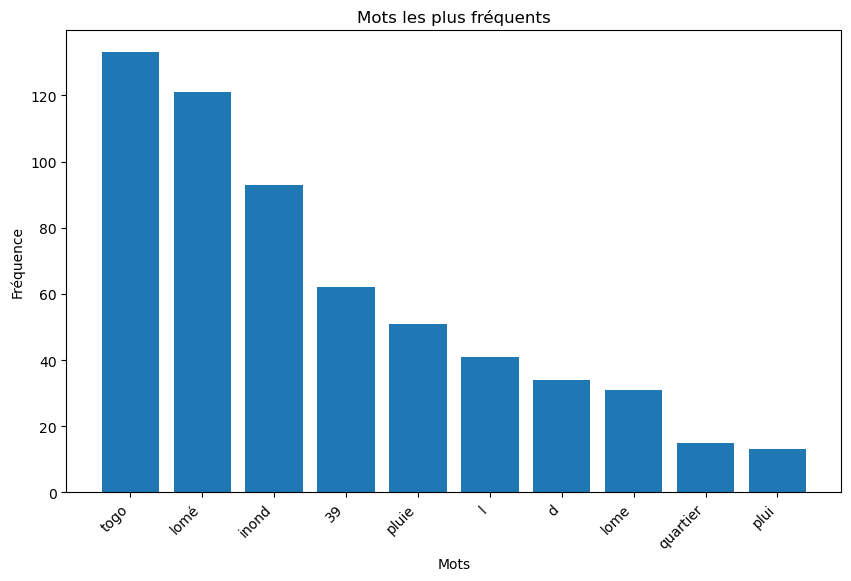

In [61]:
from nltk import FreqDist

def mots_plus_frequents(texte_traite, top_n=30):
    mots = texte_traite.split()
    freq_dist = FreqDist(mots)
    mots_freq = freq_dist.most_common(top_n)
    return mots_freq

# Affichons les 10 mots les plus fréquents
mots_freq = mots_plus_frequents(df["description_traitee"].str.cat(sep=' '), top_n=10)

# Convertissons la liste de tuples en DataFrame pour une meilleure visualisation
df_mots_freq = pd.DataFrame(mots_freq, columns=["Mot", "Fréquence"])

# Affichage du  DataFrame
print(df_mots_freq)

# Traçé un diagramme à barres pour visualiser les mots les plus fréquents
plt.figure(figsize=(10, 6))
plt.bar(df_mots_freq["Mot"], df_mots_freq["Fréquence"])
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.title("Mots les plus fréquents")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Pour être plus spécifique au Togo, sélectionnons les mots qui permettent de cibler les innondations portant sur le Togo

In [62]:
mots = ['bè kpéhénou', "hedjranawo ", "agoè kitidjan", "Agoè kitidjan", " agoè 2 lion",
        "inondations mortelles", "mortel", "inond", "diluvienn", "glissement", "mort", "fort pluie",
        "chut d ’ arbr ", "ravagé", "togo", "kara", "marché",
        'gross pluie', "lomé", "loméens", "akoumapé", "naufrage",
        "terribl pluie", "gbadago", "kôdjoviakôpé",'lome',
        'tempête', 'submergée', 'eaux', 'KARA',
        'diluvien', 'glissements', "athièmé", 'todman', 'chute d arbr', "école"]


In [63]:
import re

# Expression régulière en utilisant les éléments de la liste "mots"
pattern = '|'.join(map(re.escape, mots))

# Filtrons les lignes où "description_traitee" contient au moins un des éléments de la liste
df['description_traitee'] = df['description_traitee'].apply(lambda x: x if re.search(pattern, x, flags=re.IGNORECASE) else '')


#### Recueillons les données pour chaque localité du dataset

In [64]:
localites=['bè kpéhénou',"hedjranawo ","agoè kitidjan","Agoè kitidjan"," agoè 2 lion",
          "togo","kara","marché","akoumapé","gbadago","kôdjoviakôpé",'lome',
           "athièmé",'todman',"agoé","amadahom"," agoè nyivé","tokoin hôpital"]
# Fonction pour extraire les localités d'une ligne
def extract_localites(line):
    line_lower = line.lower()  # Convertir en minuscules pour la correspondance insensible à la casse
    return [loc for loc in localites if loc.lower() in line_lower]

# Appliquons la fonction pour chaque ligne
df['Localites'] = df["description_traitee"].apply(extract_localites)

In [65]:

# Affichons le DataFrame avec les colonnes "description_traitee" et "Localites"
df[["description_traitee",  "Localites"]].head(20)



,description_traitee,Localites
0,inond lomé,[]
1,inond lomé caus fort pluie lome togo,"[togo, lome]"
2,togo lom inond pluie 12 07 2023 inond togo plu...,[togo]
3,togo grand lomé inond,[togo]
4,inond mortel nord est l 39 itali sign quot tro...,[]
5,lomé inond agoè kitidjan sou eaux,"[agoè kitidjan, Agoè kitidjan]"
6,bassin rétention efficac certain quartier lomé,[]
7,gross pluie ce matin lomé dégât sont énorm no ...,[]
8,togo lomé after the rain septemb 2,[togo]
9,inond lomé,[]


In [66]:
df["description_traitee"][2]

'togo lom inond pluie 12 07 2023 inond togo pluie lomé'

In [67]:
df["description_traitee"][45]

'innond lomé togo'

In [68]:

df[['description_traitee', 'Localites']].tail(12)


,description_traitee,Localites
388,énoulédjo togo,[togo]
389,togo nicola lawson enfonc clou,[togo]
390,baduida nouveau marché marché lomé togo diaspo...,"[togo, marché]"
391,quan il pleut togo réalité condit vie togolai,[togo]
392,amadahom lome togo vlog lome quartier togo vil...,"[togo, lome, amadahom]"
393,cartographi drone l 39 hôtel paix lomé togo,[togo]
394,togo lomé infrastructur équipement cart visit ...,[togo]
395,,[]
396,pluie pluie tomb depui 4h matin togo lomé hum ...,[togo]
397,zone tokoin hôpital lomé togo,"[togo, tokoin hôpital]"


In [69]:
# Fonction pour extraire les localités d'une ligne
def extract_localites(line):
    line_lower = line.lower()  # Convertir en minuscules pour la correspondance insensible à la casse
    localites_extracted = [loc for loc in localites if loc.lower() in line_lower]
    
    # Exclure le terme "togo" de la liste des localités extraites
    localites_extracted = [loc for loc in localites_extracted if loc.lower() != 'togo']
    
    return localites_extracted

# Appliquer la fonction pour chaque ligne
df['Localites'] = df["description_traitee"].apply(extract_localites)

#

In [70]:
# Affichons le DataFrame avec la colonne "Localites" mise à jour
df[['description_traitee', 'Localites']].head(20)


,description_traitee,Localites
0,inond lomé,[]
1,inond lomé caus fort pluie lome togo,[lome]
2,togo lom inond pluie 12 07 2023 inond togo plu...,[]
3,togo grand lomé inond,[]
4,inond mortel nord est l 39 itali sign quot tro...,[]
5,lomé inond agoè kitidjan sou eaux,"[agoè kitidjan, Agoè kitidjan]"
6,bassin rétention efficac certain quartier lomé,[]
7,gross pluie ce matin lomé dégât sont énorm no ...,[]
8,togo lomé after the rain septemb 2,[]
9,inond lomé,[]


In [71]:
df[["description_traitee", "Localites"]].tail(10)

,description_traitee,Localites
390,baduida nouveau marché marché lomé togo diaspo...,[marché]
391,quan il pleut togo réalité condit vie togolai,[]
392,amadahom lome togo vlog lome quartier togo vil...,"[lome, amadahom]"
393,cartographi drone l 39 hôtel paix lomé togo,[]
394,togo lomé infrastructur équipement cart visit ...,[]
395,,[]
396,pluie pluie tomb depui 4h matin togo lomé hum ...,[]
397,zone tokoin hôpital lomé togo,[tokoin hôpital]
398,togo lomé vue d 39 haut rout boulevard natur é...,[]
399,dialect ewe sud togo pouvoir langu parlé 1éme ...,[]


In [72]:
# Ajustons la colonne "Localites" pour contenir un seul élément
df['Localites'] = df['Localites'].apply(lambda x: x[0] if x else 'Togo')



In [73]:
# Concaténons les lignes où "Localites" est égal à "Togo"
df['Localites'] = df.apply(lambda row: 'Togo' if 'Togo' in row['Localites'] else row['Localites'], axis=1)


In [74]:
df.shape

(237, 8)

In [75]:
# Groupons le DataFrame par la colonne "Localites" et concaténer les descriptions traitées
df_grouped = df.groupby('Localites')['description_traitee'].apply(lambda x: ' '.join(x)).reset_index()

# Affichons le DataFrame groupé
df_grouped[['Localites', 'description_traitee']]


,Localites,description_traitee
0,agoè 2 lion,togo inond zone agoè 2 lion attent solut
1,agoè nyivé,inond popul d 39 agoè nyivé 1 risquent pire si...
2,Togo,inond lomé togo lom inond pluie 12 07 2023 ino...
3,agoè kitidjan,lomé inond agoè kitidjan sou eaux
4,akoumapé,waca togo sauv akoumapé inond
5,athièmé,togo inond athièmé madjikpeto
6,bè kpéhénou,lomé bè kpéhénou inond rout pluie lomé bè kpéh...
7,gbadago,inond lome quartier gbadago
8,hedjranawo,inond marché hedjranawo togo lome togo
9,kara,inond togo fort pluie ce périod d 39 evala kara


In [76]:
df_grouped[ 'description_traitee'][1]

'inond popul d 39 agoè nyivé 1 risquent pire si rien n 39 fait'

In [77]:
df_grouped[ 'description_traitee'][4]

'waca togo sauv akoumapé inond'

In [78]:
# Fonction pour le prétraitement d'une chaîne (enlever les mots de localites)
def remove_localites(text):
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Supprimer les mots de localites
    processed_tokens = [token for token in tokens if token.lower() not in localites]
    
    return ' '.join(processed_tokens)


In [79]:
# Appliquons le prétraitement à la colonne "description_traitee"
df_grouped['description_traitee'] = df_grouped['description_traitee'].apply(remove_localites)


In [80]:
df_grouped[ 'description_traitee'][4]

'waca sauv inond'

In [81]:
df_grouped[ 'description_traitee'][12]

'ravagé incendi pain d 39 assigamé grand lomé baduida nouveau lomé diaspora d agoè assiyéyé célèbre se noce d étain pain d 39 assigamé grand lomé incendi hanoukopé encor appelé togotoutvabien lomelabel ccapdenubuek derrièr d 39 adidogom assiyéyé baduida nouveau lomé diaspora'

In [82]:
from collections import Counter

# Concaténons toutes les descriptions traitées en une seule chaîne
all_processed_text = ' '.join(df_grouped['description_traitee'])

# Tokenisons les mots
tokens = word_tokenize(all_processed_text)

# Comptage de l'occurrence des mots
word_occurrences = Counter(tokens)

# Affichage des occurrences des mots
for word, count in word_occurrences.items():
    print(f"{word}: {count}")



inond: 93
zone: 6
agoè: 7
2: 5
lion: 1
attent: 1
solut: 3
popul: 4
d: 31
39: 55
nyivé: 1
1: 2
risquent: 1
pire: 1
si: 1
rien: 1
n: 2
fait: 5
lomé: 121
lom: 1
pluie: 49
12: 4
07: 1
2023: 1
grand: 10
mortel: 4
nord: 4
est: 4
l: 38
itali: 4
sign: 3
quot: 12
tropicalis: 3
climat: 3
bassin: 1
rétention: 1
efficac: 1
certain: 1
quartier: 15
gross: 1
ce: 8
matin: 4
dégât: 4
sont: 1
énorm: 1
no: 4
comment: 3
after: 3
the: 4
rain: 2
septemb: 2
la: 2
tomb: 3
mai: 6
rout: 12
togolais: 8
inachevée: 2
viral: 1
tiktok: 1
trend: 1
challeng: 1
diakité: 1
terribl: 1
suivi: 2
sou: 9
eaux: 7
glissement: 1
terrain: 2
ind: 3
imag: 3
plui: 11
diluvienn: 4
lyon: 1
samedi: 1
migrant: 1
forcé: 1
retour: 1
s: 2
entraid: 1
clôture: 2
aéroport: 2
californi: 1
submergé: 1
liby: 2
tempêt: 2
daniel: 3
moin: 5
150: 2
mort: 7
caus: 3
ivorian: 1
refuge: 1
dilemma: 1
as: 1
their: 1
statu: 1
near: 1
end: 1
perl: 3
afriqu: 4
ouest: 2
voici: 2
chut: 2
arbr: 4
nouveau: 4
port: 1
pêche: 1
don: 1
japon: 1
aprè: 2
douleur: 1
k

In [83]:
# Créer un dictionnaire de poids pour chaque mot
poids_mots = {
    "inond": 5,
    "sou eaux": 5,
    "pluie": 2,
    "terribl": 5,
    "gross": 4,
    "gross pluie": 5,
    "diluvienn": 5,
    "naufrage": 5,
    "mortel": 5,
    'tempêt': 4,
    'submergé': 4,
    "chut d ’ arbr ": 4,
    "énorm": 3,
    "mort": 5,
    "chut": 4,
    "chute": 4,
    "naufrag": 4,
    "chaotic": 4,
    "inquiétud": 3,
    "catastroph": 5,
    "degat": 4,
    "violent": 5,
    "eau": 2,
    "torrent": 4,
    "évacuat": 4,
    "grand": 3
}

# Fonction pour calculer le score de gravité d'une description traitée
def calculer_score(description_traitee):
    tokens = word_tokenize(description_traitee)
    score = sum(poids_mots.get(token, 0) for token in tokens)
    return score

# Ajouter une colonne "score_gravite" au DataFrame
df_grouped['score_gravite'] = df_grouped['description_traitee'].apply(calculer_score)



In [84]:
# Affichage du DataFrame avec la colonne "score_gravite"
df_grouped[['Localites', 'description_traitee', 'score_gravite']]


,Localites,description_traitee,score_gravite
0,agoè 2 lion,inond zone agoè 2 lion attent solut,5
1,agoè nyivé,inond popul d 39 agoè nyivé 1 risquent pire si...,5
2,Togo,inond lomé lom inond pluie 12 07 2023 inond pl...,627
3,agoè kitidjan,lomé inond agoè kitidjan sou eaux,5
4,akoumapé,waca sauv inond,5
5,athièmé,inond madjikpeto,5
6,bè kpéhénou,lomé bè kpéhénou inond rout pluie lomé bè kpéh...,14
7,gbadago,inond quartier,5
8,hedjranawo,inond hedjranawo,5
9,kara,inond fort pluie ce périod d 39 evala,7


In [85]:
# Supprimons les lignes contenant les mots "marché" ou "togo" dans la colonne "Localites"
df_grouped = df_grouped[~df_grouped['Localites'].str.contains('marché|Togo', case=False)]

# Réinitialisation les index du DataFrame
df_grouped.reset_index(drop=True, inplace=True)


#### Nous avons décidé de supprimer dans la colonne "Localites" le Togo car, nous y avons rassembler les informations où les localités n'ont pas été précisées explicitement. De plus nous avons supprimé  "marché" car les informations étaient plus liées à l'incendie.

In [86]:
# Affichage le DataFrame avec la colonne "score_gravite"
df_grouped[['Localites', 'description_traitee', 'score_gravite']]


,Localites,description_traitee,score_gravite
0,agoè 2 lion,inond zone agoè 2 lion attent solut,5
1,agoè nyivé,inond popul d 39 agoè nyivé 1 risquent pire si...,5
2,agoè kitidjan,lomé inond agoè kitidjan sou eaux,5
3,akoumapé,waca sauv inond,5
4,athièmé,inond madjikpeto,5
5,bè kpéhénou,lomé bè kpéhénou inond rout pluie lomé bè kpéh...,14
6,gbadago,inond quartier,5
7,hedjranawo,inond hedjranawo,5
8,kara,inond fort pluie ce périod d 39 evala,7
9,kôdjoviakôpé,kid lomé vlog kid lomé vlog,0


In [91]:
##  Eimport folium

# Coordonnées des localités dans la région maritime du Togo
coordonnees = {
    "Agoè 2 Lions": (6.21688970310961, 1.188701164799092),
    "agoè nyivé": (6.24241895896187, 1.2086657147407907),
    "akoumapé": (6.38703887463534, 1.444787966810721),
    "bè kpéhénou": (6.164170313762698, 1.2574596224869539),
    "lomé": (6.2136040125389655, 1.2018548089745755),
}

# Scores de gravité pour chaque localité
scores_gravites = {
    "Agoè 2 Lions": 5,
    "agoè nyivé": 5,
    "akoumapé": 5,
    "bè kpéhénou": 16,
    "lomé": 75,
}
# Création une carte centrée sur la région maritime du Togo
carte = folium.Map(location=[6.5, 1.2], zoom_start=10)

# Ajout des marqueurs pour chaque localité avec un popup affichant la gravité
for localite, coordonnees in coordonnees.items():
    lat, lon = coordonnees
    gravite = scores_gravites.get(localite, 0)  # Récupération la gravité ou 0 si non trouvée
    couleur = 'red' if gravite > 30 else 'orange' if gravite > 15 else 'green'
    folium.Marker(
        location=[lat, lon],
        popup=f"{localite} - Gravité : {gravite}",
        icon=folium.Icon(color=couleur)
    ).add_to(carte)

# Enregistrement de la carte au format HTML
carte.save('carte_inondations_couleurs_maritime.html')

# Affichage la carte dans le notebook
carte
